## Planet challenge : preliminary analysis

### Tasks : 
- Look at the distribution of the label (global distribution & co-occurences)
- Analyze images : look at low dimension embeddings of the image using t-SNE  
- Given unbalanced distribution of labels, we might think a bit about the training set we want to build. 

Once we have done this we can start considerning models for classification (we may start with a simpler problem first to evaluate a broad category of models for ex : binary classification).

Also an other issue to address is which image to use. There is two type of images .jpg (low resolution) and .tiff (high resolution). Some comments on the challenge page suggest that sometimes the two images do not match. It's important to follow-up on that point.

### Notes and thoughts
Additionally to RGB data we also have access to infrared data. Infrared probably discrimate accurately between road and river (to test). 
As we work with images, convolutional neural networks seem the obvious choice. However, the nature of the data would require to combine several classifiers (one for each tag). We could also envision to combine NN outputs with a random forest algorithm.


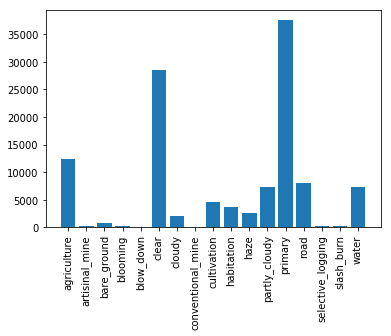

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# preliminary data analysis 
# looking at the distribution of tags

labels = pd.read_csv("../data/train_v2.csv") # load trainning labels file
n = labels['image_name'].size       
labels = labels.values               # convert as numpy array

tags = [] # store all tags 
for i in range(n):
    curr_tag = labels[i,1]
    tags = np.append(tags, str.split(curr_tag)) 

unique, counts = np.unique(tags, return_counts=True)
all_tags = unique

# plot 
fig, ax = plt.subplots()
plt.xticks(range(len(counts)), unique)
plt.bar(range(len(counts)), counts)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.show()

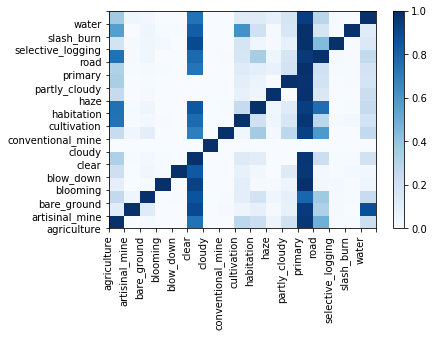

In [12]:
# look at co-occurence of tags 
res = dict()
for tag in all_tags:
    coocc = []    # store all co-occurences of current tag
    for i in range(n):
        curr_tag = str.split(labels[i,1], " ")
        if tag in curr_tag:
            coocc = np.append(coocc, curr_tag)

    # store stats for current tag
    if len(coocc) == 0:
        continue
    unique, counts = np.unique(coocc, return_counts=True)
    counts = counts/float(max(counts))    # normalize counts
    stats = dict(zip(unique,counts))
    res[tag] = stats

coocc_array = np.zeros((len(all_tags),len(all_tags)))
i = 0;
for tag1 in all_tags:
    j = 0
    for tag2 in all_tags:
        if tag1 in res.keys():
            curr = res[tag1]
            if tag2 in curr.keys():
                coocc_array[i, j] = curr[tag2]
        j = j + 1
    i = i + 1

fig, ax = plt.subplots()
plt.xticks(range(n), all_tags)
plt.yticks(range(n), all_tags)
plt.pcolor(coocc_array, cmap=plt.cm.Blues)
ax.set_yticklabels(ax.xaxis.get_majorticklabels(), rotation=0)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.colorbar()
plt.show()

It's important to notice that labels can contain more than two tags so this visualization is not exhaustive, but helps having a representation of the data. Here we can see the distribution of labels according to their number of tags


1 : 2091
2 : 19176
3 : 7192
4 : 7171
5 : 3700
6 : 996
7 : 127
8 : 24
9 : 2


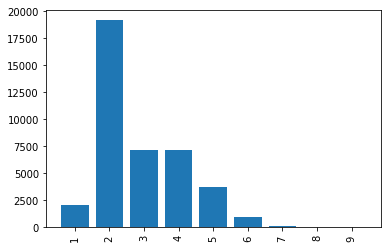

In [57]:
n_tags = dict() # store all tags 
for i in range(n):
    curr_tag = labels[i,1]
    s = str(len(curr_tag.split()))
    if s in n_tags:
        n_tags[s] += 1
    else:
        n_tags[s] = 1

listed_values = []
for i in sorted(n_tags.keys()):
    listed_values.append(n_tags[i])
    print("{} : {}".format(i, n_tags[i]))
# plot 
fig, ax = plt.subplots()
plt.xticks(range(len(n_tags.keys())), sorted(n_tags.keys()))
plt.bar(range(len(n_tags.keys())), listed_values)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.show()

In [33]:
for i in range(n):
    curr_tag = labels[i,1]
    if len(curr_tag.split()) > 7:
        print curr_tag

agriculture artisinal_mine clear cultivation habitation primary road water
agriculture clear cultivation cultivation habitation primary road slash_burn water
agriculture artisinal_mine clear cultivation habitation primary road water
agriculture artisinal_mine clear cultivation habitation primary road water
agriculture clear cultivation cultivation habitation primary road water
agriculture artisinal_mine clear conventional_mine cultivation habitation primary road water
agriculture clear cultivation cultivation habitation primary road water
agriculture clear cultivation habitation primary road slash_burn water
agriculture clear cultivation primary road selective_logging slash_burn water
agriculture bare_ground clear cultivation habitation primary road selective_logging
agriculture clear cultivation cultivation habitation primary road water
agriculture clear cultivation cultivation habitation primary road water
agriculture cultivation cultivation habitation partly_cloudy primary road wate

Some labels are redundant, we would need to make sure to uniquely identify them.

agriculture artisinal_mine clear conventional_mine cultivation habitation primary road water
1 : 2091
2 : 19176
3 : 7194
4 : 7191
5 : 3697
6 : 993
7 : 124
8 : 12
9 : 1


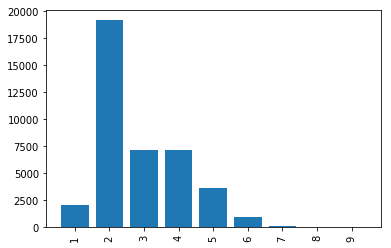

In [58]:
# Correct for redundant labels
n_tags_unique = dict() # store all tags 
l = 3
for i in range(n):
    curr_tag = labels[i,1]
    tags = curr_tag.split()
    unique = np.unique(tags)
    n_u = len(unique)
    if n_u in n_tags_unique:
        n_tags_unique[n_u] += 1
    else:
        n_tags_unique[n_u] = 1
    if n_u > 8:
        print curr_tag

listed_values = []
for i in sorted(n_tags_unique.keys()):
    listed_values.append(n_tags_unique[i])
    print("{} : {}".format(i, n_tags_unique[i]))
# plot 
fig, ax = plt.subplots()
plt.xticks(range(len(n_tags_unique.keys())), sorted(n_tags_unique.keys()))
plt.bar(range(len(n_tags_unique.keys())), listed_values)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.show()


The correction is minimal...